In [14]:
import pandas as pd

In [15]:
#read the data
df = pd.read_csv('Data/Cleaned_Airbnb_Data.csv')
df_no_outliers = pd.read_csv('Data/Cleaned_Airbnb_Data_No_Outliers.csv')

#### One Hot Encoding

In [3]:
# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=['room_type', 'neighbourhood', 'city', 'state'], drop_first=True)

#### Creating Sample of the Data

In [16]:
# Sample 20% of the data
df_sample = df_encoded.sample(frac=0.2, random_state=42)

# Check the size of the sampled data
print(f"Sampled data size: {df_sample.shape}")

Sampled data size: (187271, 946)


In [18]:
# Separate features (X) and target variable (y)
X = df_sample.drop(columns=['price'])  # Features
y = df_sample['price']  # Target variable


In [19]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the size of the training and testing sets
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (149816, 945)
Testing set size: (37455, 945)


In [20]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [55]:

from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [56]:
# Train the model on the training data
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print(f"Mean Absolute Error (MAE) for Price Prediction: {mae}")
print(f"Mean Squared Error (MSE) for Price Prediction: {mse}")
print(f"R-squared (R2) for Price Prediction: {r2}")


Mean Absolute Error (MAE) for Price Prediction: 102.47439449338722
Mean Squared Error (MSE) for Price Prediction: 254598.77248739693
R-squared (R2) for Price Prediction: 0.1278489965902413


In [25]:
import xgboost as xgb

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model on the training data
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print(f"Mean Absolute Error (MAE) for Price Prediction: {mae}")
print(f"Mean Squared Error (MSE) for Price Prediction: {mse}")
print(f"R-squared (R2) for Price Prediction: {r2}")


Mean Absolute Error (MAE) for Price Prediction: 129.19945710519255
Mean Squared Error (MSE) for Price Prediction: 325459.43175672804
R-squared (R2) for Price Prediction: -0.11489056762774186


In [28]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize the KNN regressor with a specified number of neighbors (k)
knn_model = KNeighborsRegressor(n_neighbors=5)

# Train the model on the training data
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [29]:
# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print(f"Mean Absolute Error (MAE) for Price Prediction: {mae}")
print(f"Mean Squared Error (MSE) for Price Prediction: {mse}")
print(f"R-squared (R2) for Price Prediction: {r2}")


Mean Absolute Error (MAE) for Price Prediction: 128.57683627847564
Mean Squared Error (MSE) for Price Prediction: 249822.85308707683
R-squared (R2) for Price Prediction: 0.1442093382230727


### No Outliers

In [4]:
df_no_outliers

,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city,state
0,8028,78702,30.260570,-97.734410,Entire home/apt,126.0,2,657,3.72,1,306,42,Austin,Texas
1,8186,78729,30.456970,-97.784220,Private room,45.0,1,290,1.77,1,0,21,Austin,Texas
2,13879,78704,30.248850,-97.735870,Entire home/apt,57.0,30,122,0.73,1,0,3,Austin,Texas
3,14156,78704,30.260340,-97.764870,Entire home/apt,159.0,3,305,2.09,1,156,17,Austin,Texas
4,25298,78741,30.234660,-97.736820,Entire home/apt,48.0,4,51,0.31,1,98,3,Austin,Texas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845884,245843895,North Queen Anne,47.643094,-122.354017,Entire home/apt,179.0,1,0,0.00,2,296,0,Seattle,Washington
845885,529119042,Mann,47.602287,-122.300789,Private room,59.0,1,0,0.00,35,88,0,Seattle,Washington
845886,184675574,Bryant,47.665714,-122.289243,Private room,82.0,2,0,0.00,4,26,0,Seattle,Washington
845887,584875397,Roxhill,47.531331,-122.374214,Entire home/apt,222.0,2,0,0.00,1,171,0,Seattle,Washington


In [11]:
df_no_outliers_encoded = pd.get_dummies(df_no_outliers, columns=['room_type', 'neighbourhood', 'city', 'state'], drop_first=True)

In [12]:
#sample 20% of the data without outliers
df_no_outliers_sample = df_no_outliers_encoded.sample(frac=0.2, random_state=42)

# Check the size of the sampled data without outliers
print(f"Sampled data size without outliers: {df_no_outliers_sample.shape}")

Sampled data size without outliers: (169178, 945)


In [10]:
#separate features and target variable without outliers
X_no_outliers = df_no_outliers_sample.drop(columns=['price'])  # Features
y_no_outliers = df_no_outliers_sample['price']  # Target variable

In [13]:
# Split the data without outliers into training and testing sets (80% train, 20% test)
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, random_state=42)

# Check the size of the training and testing sets without outliers
print(f"Training set size without outliers: {X_train_no_outliers.shape}")
print(f"Testing set size without outliers: {X_test_no_outliers.shape}")

NameError: name 'train_test_split' is not defined

### Scaling

In [62]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train_no_outliers)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test_no_outliers)

### Random Forest

In [61]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [63]:
# Train the model on the training data without outliers
model.fit(X_train_no_outliers, y_train_no_outliers)


RandomForestRegressor(random_state=42)

In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred_no_outliers = model.predict(X_test_no_outliers)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test_no_outliers, y_pred_no_outliers)
mse = mean_squared_error(y_test_no_outliers, y_pred_no_outliers)
r2 = r2_score(y_test_no_outliers, y_pred_no_outliers)

# Display the results
print(f"Mean Absolute Error (MAE) for Price Prediction: {mae}")
print(f"Mean Squared Error (MSE) for Price Prediction: {mse}")
print(f"R-squared (R2) for Price Prediction: {r2}")

Mean Absolute Error (MAE) for Price Prediction: 35.67306785735047
Mean Squared Error (MSE) for Price Prediction: 2578.964662040521
R-squared (R2) for Price Prediction: 0.5444493155121304


### Saving the Model

In [90]:
import pickle

# Save the trained model to a file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [91]:
import numpy as np

# Load the model from the file
with open('random_forest_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Now you can use loaded_model to make predictions
y_pred_loaded = loaded_model.predict(X_test_no_outliers)

# You can also re-calculate evaluation metrics if needed
loaded_mae = mean_absolute_error(y_test_no_outliers, y_pred_loaded)
loaded_mse = mean_squared_error(y_test_no_outliers, y_pred_loaded)
loaded_r2 = r2_score(y_test_no_outliers, y_pred_loaded)

# Display the results for the loaded model
print(f"Loaded Model Mean Absolute Error (MAE): {loaded_mae}")
print(f"Loaded Model Mean Squared Error (MSE): {loaded_mse}")
print(f"Loaded Model R-squared (R2): {loaded_r2}")

# Make predictions with the original and loaded models
original_prediction = model.predict(X_test_no_outliers)
loaded_prediction = loaded_model.predict(X_test_no_outliers)

# Check the accuracy of both models
print("Original model accuracy (R2):", model.score(X_test_no_outliers, y_test_no_outliers))
print("Loaded model accuracy (R2):", loaded_model.score(X_test_no_outliers, y_test_no_outliers))

# Verify that the predictions are the same
if np.array_equal(original_prediction, loaded_prediction):
    print("The loaded model produces the same predictions as the original model.")
else:
    print("Something went wrong. The predictions don't match.")

Loaded Model Mean Absolute Error (MAE): 35.67306785735047
Loaded Model Mean Squared Error (MSE): 2578.964662040521
Loaded Model R-squared (R2): 0.5444493155121304
Original model accuracy (R2): 0.5444493155121304
Loaded model accuracy (R2): 0.5444493155121304
The loaded model produces the same predictions as the original model.


In [92]:
import os

file_path = 'random_forest_model.pkl'
if os.path.getsize(file_path) > 0:
    with open(file_path, 'rb') as file:
        model = pickle.load(file)
else:
    print("File is empty or does not exist.")

### xgboost

In [65]:
import xgboost as xgb

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model on the training data
xgb_model.fit(X_train_no_outliers, y_train_no_outliers)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred_no_outliers = xgb_model.predict(X_test_no_outliers)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test_no_outliers, y_pred_no_outliers)
mse = mean_squared_error(y_test_no_outliers, y_pred_no_outliers)
r2 = r2_score(y_test_no_outliers, y_pred_no_outliers)

# Display the results
print(f"Mean Absolute Error (MAE) for Price Prediction: {mae}")
print(f"Mean Squared Error (MSE) for Price Prediction: {mse}")
print(f"R-squared (R2) for Price Prediction: {r2}")

Mean Absolute Error (MAE) for Price Prediction: 43.35401789224843
Mean Squared Error (MSE) for Price Prediction: 3328.371416412664
R-squared (R2) for Price Prediction: 0.4120734187272761


### KNN

In [67]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize the KNN regressor with a specified number of neighbors (k)
knn_model = KNeighborsRegressor(n_neighbors=5)

# Train the model on the training data
knn_model.fit(X_train_no_outliers, y_train_no_outliers)

KNeighborsRegressor()

In [68]:
# Make predictions on the test set
y_pred_no_outliers = knn_model.predict(X_test_no_outliers)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test_no_outliers, y_pred_no_outliers)
mse = mean_squared_error(y_test_no_outliers, y_pred_no_outliers)
r2 = r2_score(y_test_no_outliers, y_pred_no_outliers)

# Display the results
print(f"Mean Absolute Error (MAE) for Price Prediction: {mae}")
print(f"Mean Squared Error (MSE) for Price Prediction: {mse}")
print(f"R-squared (R2) for Price Prediction: {r2}")

Mean Absolute Error (MAE) for Price Prediction: 47.16956496039722
Mean Squared Error (MSE) for Price Prediction: 4261.2376321078145
R-squared (R2) for Price Prediction: 0.24729107434288566


### Linear Regression 

In [69]:
from sklearn.linear_model import LinearRegression

# Initialize the model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train_no_outliers, y_train_no_outliers)

# Predict and evaluate
y_pred_no_outliers = linear_model.predict(X_test_no_outliers)

In [70]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_no_outliers, y_pred_no_outliers)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test_no_outliers, y_pred_no_outliers)

# Calculate R-squared (R²)
r2 = r2_score(y_test_no_outliers, y_pred_no_outliers)

# Display the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 50.13913700829972
Mean Squared Error (MSE): 4127.945130072809
R-squared (R²): 0.27083598421811583


In [71]:
results = {
    'Model': ['Random Forest', 'XGBoost', 'KNN', 'Linear Regression'],
    'MAE': [35.67, 43.35, 47.16, 50.13],
    'MSE': [2578.96, 3328.37, 4261.23, 4127.94],
    'R2': [0.544, 0.412, 0.247, 0.270]
}

In [72]:
df_results = pd.DataFrame(results)

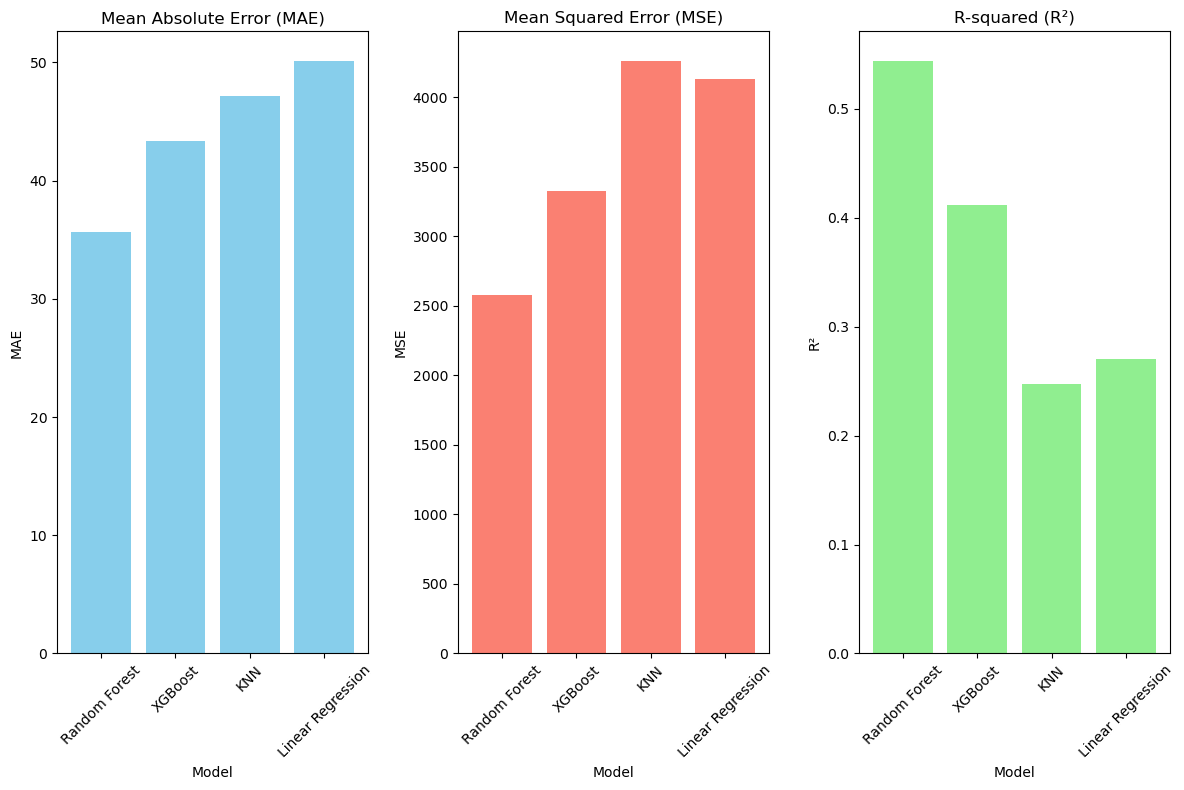

In [74]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot MAE
plt.subplot(1, 3, 1)
plt.bar(df_results['Model'], df_results['MAE'], color='skyblue')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.xticks(rotation=45) 

# Plot MSE
plt.subplot(1, 3, 2)
plt.bar(df_results['Model'], df_results['MSE'], color='salmon')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.xticks(rotation=45) 

# Plot R²
plt.subplot(1, 3, 3)
plt.bar(df_results['Model'], df_results['R2'], color='lightgreen')
plt.title('R-squared (R²)')
plt.xlabel('Model')
plt.ylabel('R²')
plt.xticks(rotation=45) 

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [94]:
df_no_outliers

,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city,state
0,8028,78702,30.260570,-97.734410,Entire home/apt,126.0,2,657,3.72,1,306,42,Austin,Texas
1,8186,78729,30.456970,-97.784220,Private room,45.0,1,290,1.77,1,0,21,Austin,Texas
2,13879,78704,30.248850,-97.735870,Entire home/apt,57.0,30,122,0.73,1,0,3,Austin,Texas
3,14156,78704,30.260340,-97.764870,Entire home/apt,159.0,3,305,2.09,1,156,17,Austin,Texas
4,25298,78741,30.234660,-97.736820,Entire home/apt,48.0,4,51,0.31,1,98,3,Austin,Texas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845884,245843895,North Queen Anne,47.643094,-122.354017,Entire home/apt,179.0,1,0,0.00,2,296,0,Seattle,Washington
845885,529119042,Mann,47.602287,-122.300789,Private room,59.0,1,0,0.00,35,88,0,Seattle,Washington
845886,184675574,Bryant,47.665714,-122.289243,Private room,82.0,2,0,0.00,4,26,0,Seattle,Washington
845887,584875397,Roxhill,47.531331,-122.374214,Entire home/apt,222.0,2,0,0.00,1,171,0,Seattle,Washington


In [103]:
#drop columns that are not needed
df_no_outliers_new = df_no_outliers.drop(columns=['host_id', 'latitude', 'longitude', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'number_of_reviews_ltm'  ])


KeyError: "['host_id', 'latitude', 'longitude', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'number_of_reviews_ltm'] not found in axis"

In [104]:
df_no_outliers_new

NameError: name 'df_no_outliers_new' is not defined